# Problem 2.
Flu shots. A local health clinic sent fliers to its clients to encourage 
everyone, but especially older persons at high risk of complications, to get a flu shot in 
time for protection against an expected flu epidemic. In a pilot follow-up study, 159 
clients were randomly selected and asked whether they actually received a flu shot. A 
client who received a flu shot was coded Y = 1, and a client who did not receive a flu 
shot was coded Y = 0. In addition, data were collected on their age (X1) and their health 
awareness. The latter data were combined into a health awareness index (X2), for which 
higher values indicate greater awareness. Also included in the data was client gender, 
where males were coded X3 = 1 and females were coded X3 = 0.
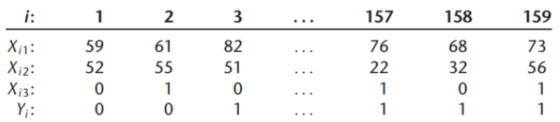

Multiple logistic regression model (14.41) with three predictor variables in first-order 
terms is assumed to be appropriate.

a. Find the maximum likelihood estimates of β0, β1, β2, and β3. State the fitted response
function.

b. Obtain exp(b1), exp(b2), and exp(b3). Interpret these numbers.

c. What is the estimated probability that male clients aged 55 with a health awareness 
index of 60 will receive a flu shot?

d. Use the Wald test to determine whether X3, client gender, can be dropped from the 
regression model; use α = .05. State the alternatives, decision rule, and conclusion. What 
is the approximate P-value of the test?

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CH14PR14.txt', sep = '\s+', header =None, names=['Y','X1','X2','X3'])
df.head()

,Y,X1,X2,X3
0,0,59,52,0
1,0,61,55,1
2,1,82,51,0
3,0,51,70,0
4,0,53,70,0


### a. Find the maximum likelihood estimates of β0, β1, β2, and β3. State the fitted response function.

In [3]:
x1= df['X1']
x2= df['X2']
x3= df['X3']
y= df['Y']

In [4]:
import statsmodels.api as sm
X = sm.add_constant(df[['X1','X2','X3']])
Y = df['Y']

logit_model = sm.GLM(Y, X, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  159
Model:                            GLM   Df Residuals:                      155
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52.547
Date:                Sat, 10 Dec 2022   Deviance:                       105.09
Time:                        18:30:41   Pearson chi2:                     180.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1712
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1772      2.982     -0.395      0.6

In [5]:
logit_results.params

const   -1.177159
X1       0.072788
X2      -0.098986
X3       0.433975
dtype: float64

By plugging in β0 = -2.439663, β1 = 0.306704, β2 = 0.039178, β3 = -0.000888, we get the Logistic model is:

πi = [1+exp(-2.43 + 0.306 *X1 + 0.039 *X2 + -0.0008 *X3)]^(-1)

### b. Obtain exp(b1), exp(b2), and exp(b3). Interpret these numbers.

In [6]:
b1 = np.exp(logit_results.params[1])
print(b1)

1.0755025255300614


#### => the odds of completing the task increase by 7.5 percent for every unit in age

In [7]:
b2 = np.exp(logit_results.params[2])
print(b2)

0.9057549411897999


#### => the odds of completing the task decrease by  0.905 times for every unit in age

In [8]:
b3 = np.exp(logit_results.params[3])
print(b3)

1.5433800567362366


#### => the odds of completing the task increase by 54.3 percent for every unit in age

### c. What is the estimated probability that male clients aged 55 with a health awareness index of 60 will receive a flu shot?


In [16]:
# a= -1.177159 +0.072788X1 + -0.098986X2 + 0.433975X3
# => X3=1, aged 55=>X1=55, X2= 60
#calculate the probability corresponding to X
def logistic(a1):
    return (np.exp(a1) / (1 + np.exp(a1)))

a1= -1.177159 +0.072788*55 + -0.098986*60 + 0.433975*1 
pi1 = logistic(a1)
print(pi1)

0.06422370905902704


#### => The estimated probability that male clients aged 55 with a health awarenessindex of 60 (fixed x3 = 1) is 0.06422197

In [17]:
# a= -1.177159 +0.072788X1 + -0.098986X2 + 0.433975X3
# => X3=0, aged 55=>X1=55, X2= 60
#calculate the probability corresponding to X
def logistic(a0):
    return (np.exp(a0) / (1 + np.exp(a0)))

a0= -1.177159 +0.072788*55 + -0.098986*60 + 0.433975*0
pi0 = logistic(a0)
print(pi0)

0.04257504738450444


#### => The estimated probability that male clients aged 55 with a health awarenessindex of 60 (fixed x3 = 0) is 0.04257387

### d. Use the Wald test to determine whether X3, client gender, can be dropped from theregression model; use α = .05. State the alternatives, decision rule, and conclusion. Whatis the approximate P-value of the test?

#### The alternatives:
* H0 : βk = 0
* Ha : βk # 0

#### The decision rule is:
* If |z∗| ≤ z(1 − α/2), conclude H0
* If |z∗| > z(1 − α/2), conclude Ha

In [13]:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  159
Model:                            GLM   Df Residuals:                      155
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52.547
Date:                Sat, 10 Dec 2022   Deviance:                       105.09
Time:                        18:40:44   Pearson chi2:                     180.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1712
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1772      2.982     -0.395      0.6

In [15]:
z_star = 0.832 
import statsmodels.formula.api as smf
import scipy.stats as stats
z= stats.norm.ppf(1-(0.05/2))
print('z(1-α/2) = ',z)

z(1-α/2) =  1.959963984540054


#### P-value = 0.4020417

#### => We have insufficient evidence to conclude x3 into our model in predicting client’s probability of receiving flu shot.